Epoch 0, Loss: 0.2496, Accuracy: 0.3333
Epoch 1000, Loss: 0.0016, Accuracy: 1.0000
Epoch 2000, Loss: 0.0005, Accuracy: 1.0000
Epoch 3000, Loss: 0.0003, Accuracy: 1.0000
Epoch 4000, Loss: 0.0002, Accuracy: 1.0000
Epoch 5000, Loss: 0.0002, Accuracy: 1.0000
Epoch 6000, Loss: 0.0001, Accuracy: 1.0000
Epoch 7000, Loss: 0.0001, Accuracy: 1.0000
Epoch 8000, Loss: 0.0001, Accuracy: 1.0000
Epoch 9000, Loss: 0.0001, Accuracy: 1.0000


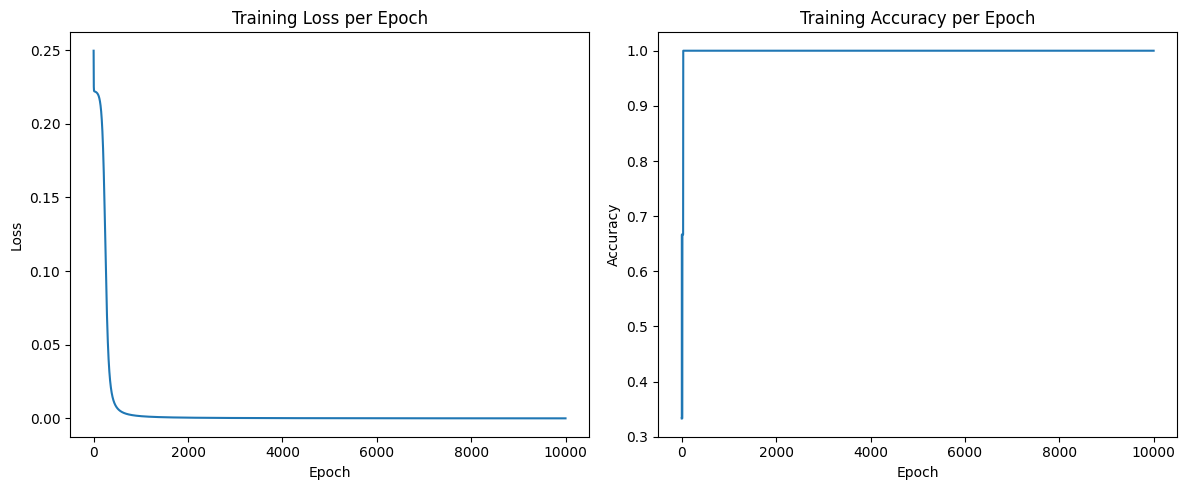


--- Model Testing ---
Input: Letter 'A'
Predicted: 'A' with probabilities: [[0.98990815 0.0077685  0.00721032]]


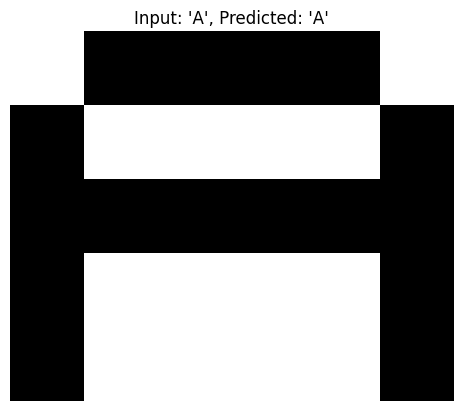

Input: Letter 'B'
Predicted: 'B' with probabilities: [[0.00789374 0.98963424 0.007713  ]]


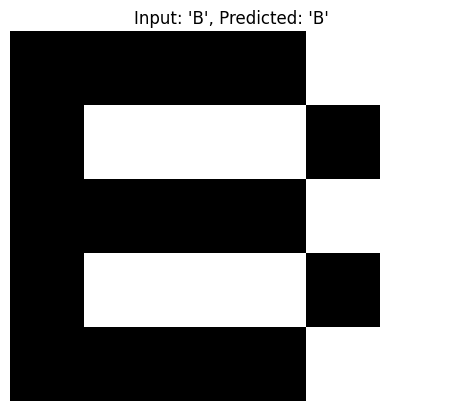

Input: Letter 'C'
Predicted: 'C' with probabilities: [[0.00739224 0.00778678 0.98998855]]


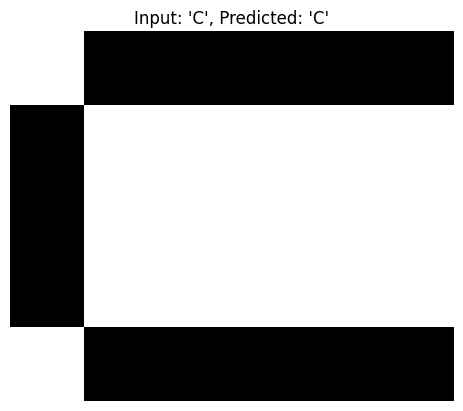


--- Testing with a noisy 'A' ---
Input: Noisy 'A'
Predicted: 'A' with probabilities: [[0.98597395 0.00434025 0.01788685]]


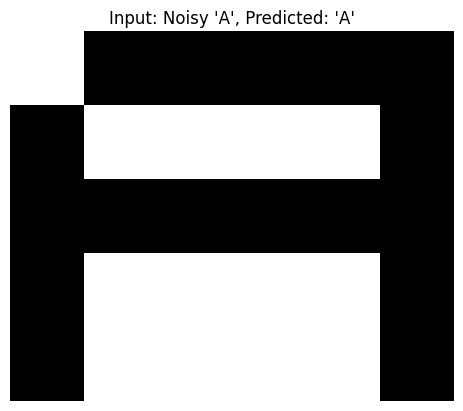

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the binary pixel patterns for letters A, B, C
# Each image is a 5x6 (30-pixel) grid encoded as a 1D array
def get_letter_pattern(letter):
    patterns = {
        'A': np.array([
            0, 1, 1, 1, 1, 0,
            1, 0, 0, 0, 0, 1,
            1, 1, 1, 1, 1, 1,
            1, 0, 0, 0, 0, 1,
            1, 0, 0, 0, 0, 1
        ]),
        'B': np.array([
            1, 1, 1, 1, 0, 0,
            1, 0, 0, 0, 1, 0,
            1, 1, 1, 1, 0, 0,
            1, 0, 0, 0, 1, 0,
            1, 1, 1, 1, 0, 0
        ]),
        'C': np.array([
            0, 1, 1, 1, 1, 1,
            1, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0,
            0, 1, 1, 1, 1, 1
        ])
    }
    return patterns[letter].reshape(1, -1) # Reshape to 1x30 for input

# Create training data
X_train = np.vstack((get_letter_pattern('A'), get_letter_pattern('B'), get_letter_pattern('C')))

# One-hot encode the target labels (A, B, C)
# A: [1, 0, 0], B: [0, 1, 0], C: [0, 0, 1]
y_train = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# 2. Neural Network Architecture and Helper Functions
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function (Mean Squared Error)
def mean_squared_error(y_true, y_predicted):
    return np.mean(np.square(y_true - y_predicted))

# 3. Initialize weights and biases
input_size = X_train.shape[1]  # 30 pixels
hidden_size = 50  # Arbitrary choice for hidden layer neurons
output_size = y_train.shape[1] # 3 classes (A, B, C)

# Initialize weights with random values from a normal distribution
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_output = np.zeros((1, output_size))

# Learning rate and epochs
learning_rate = 0.1
epochs = 10000

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# 4. Training the Neural Network using Backpropagation
for epoch in range(epochs):
    # Forward Pass
    # Input to hidden layer
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Hidden to output layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    # Calculate output layer error and delta
    error_output_layer = y_train - predicted_output
    d_predicted_output = error_output_layer * sigmoid_derivative(predicted_output)

    # Calculate hidden layer error and delta
    error_hidden_layer = np.dot(d_predicted_output, weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += np.dot(hidden_layer_output.T, d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += np.dot(X_train.T, d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Track loss and accuracy
    loss = mean_squared_error(y_train, predicted_output)
    losses.append(loss)

    # Calculate accuracy
    predictions = np.argmax(predicted_output, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == true_labels)
    accuracies.append(accuracy)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# 5. Visualize Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

# 6. Test the model and display images
def predict_letter(input_pattern):
    # Forward pass for prediction
    hidden_layer_input = np.dot(input_pattern, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Get the class with the highest probability
    predicted_class_index = np.argmax(predicted_output)
    classes = ['A', 'B', 'C']
    return classes[predicted_class_index], predicted_output

def display_letter(pattern, title=""):
    plt.imshow(pattern.reshape(5, 6), cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n--- Model Testing ---")
test_letters = ['A', 'B', 'C']

for letter in test_letters:
    test_pattern = get_letter_pattern(letter)
    predicted_letter, probabilities = predict_letter(test_pattern)
    print(f"Input: Letter '{letter}'")
    print(f"Predicted: '{predicted_letter}' with probabilities: {probabilities}")
    display_letter(test_pattern, f"Input: '{letter}', Predicted: '{predicted_letter}'")

# Test with a slightly noisy 'A' (demonstration of robustness)
noise_A = get_letter_pattern('A')
noise_A[0, 5] = 1 - noise_A[0, 5] # Flip one pixel
print("\n--- Testing with a noisy 'A' ---")
predicted_noisy_A, probabilities_noisy_A = predict_letter(noise_A)
print(f"Input: Noisy 'A'")
print(f"Predicted: '{predicted_noisy_A}' with probabilities: {probabilities_noisy_A}")
display_letter(noise_A, f"Input: Noisy 'A', Predicted: '{predicted_noisy_A}'")